In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

# Import Data

In [2]:
X_train =pd.read_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\X_train.csv')
Y_train =pd.read_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\Y_train.csv')
X_test =pd.read_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\X_test.csv')
Submission=pd.read_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\sample_submission.csv')

# Data Exploration

X_train.shape,Y_train.shape,X_test.shape

In [3]:
X_train.head()
# X_train['q']=X_train['orientation_X']**2+X_train['orientation_Y']**2+X_train['orientation_Z']**2+X_train['orientation_W']**2
# X_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
Submission.head()

,series_id,surface
0,0,concrete
1,1,concrete
2,2,concrete
3,3,concrete
4,4,concrete


Text(0.5, 1.0, 'Z-W')

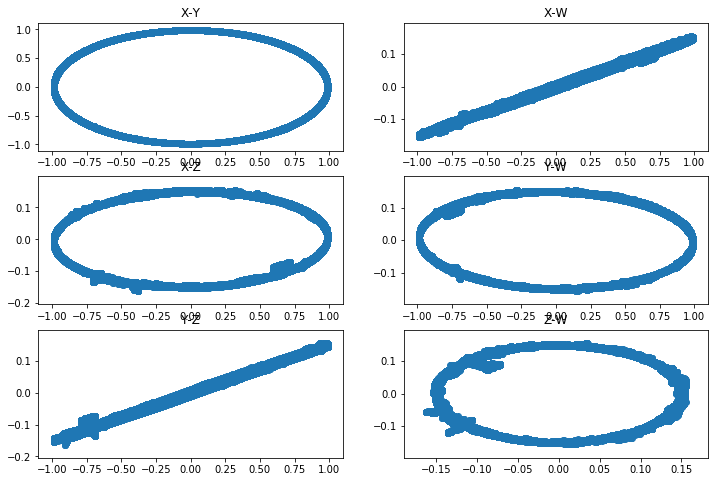

In [5]:
f,ax=plt.subplots(3,2,figsize=(12,8))
ax[0,0].scatter(X_train['orientation_X'],X_train['orientation_Y'])
ax[0,0].set_title('X-Y')
ax[1,0].scatter(X_train['orientation_X'],X_train['orientation_Z'])
ax[1,0].set_title('X-Z')
ax[2,0].scatter(X_train['orientation_Y'],X_train['orientation_Z'])
ax[2,0].set_title('Y-Z')

ax[0,1].scatter(X_train['orientation_X'],X_train['orientation_W'])
ax[0,1].set_title('X-W')
ax[1,1].scatter(X_train['orientation_Y'],X_train['orientation_W'])
ax[1,1].set_title('Y-W')
ax[2,1].scatter(X_train['orientation_Z'],X_train['orientation_W'])
ax[2,1].set_title('Z-W')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


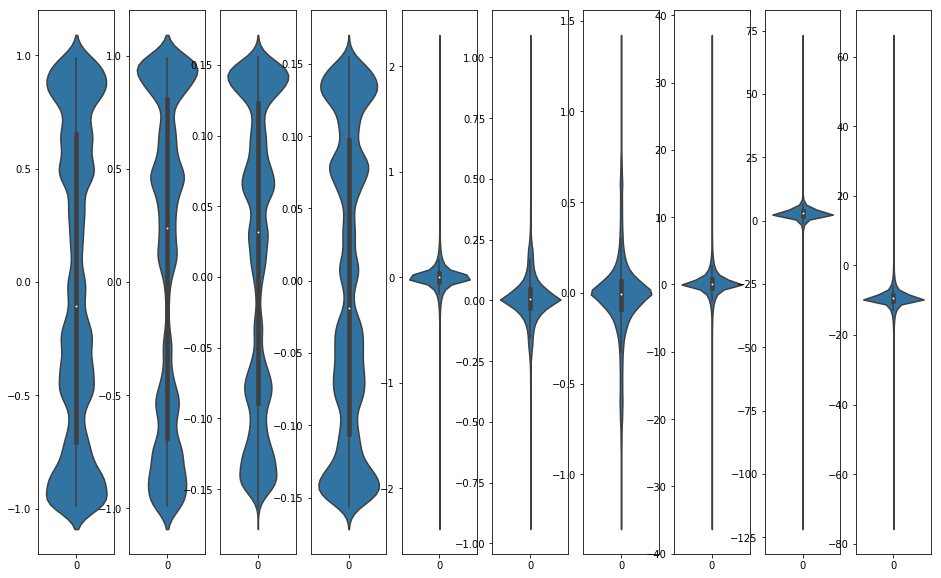

In [6]:
# sns.violinplot(data=X_train['orientation_X'],showmeans=False,showmedians=True)
fig,axes=plt.subplots(1,10,figsize=(16,10))
sns.violinplot(data=X_train['orientation_X'],showmeans=False,showmedians=True,ax=axes[0])
sns.violinplot(data=X_train['orientation_Y'],showmeans=False,showmedians=True,ax=axes[1])
sns.violinplot(data=X_train['orientation_Z'],showmeans=False,showmedians=True,ax=axes[2])
sns.violinplot(data=X_train['orientation_W'],showmeans=False,showmedians=True,ax=axes[3])
sns.violinplot(data=X_train['angular_velocity_X'],showmeans=False,showmedians=True,ax=axes[4])
sns.violinplot(data=X_train['angular_velocity_Y'],showmeans=False,showmedians=True,ax=axes[5])
sns.violinplot(data=X_train['angular_velocity_Z'],showmeans=False,showmedians=True,ax=axes[6])
sns.violinplot(data=X_train['linear_acceleration_X'],showmeans=False,showmedians=True,ax=axes[7])
sns.violinplot(data=X_train['linear_acceleration_Y'],showmeans=False,showmedians=True,ax=axes[8])
sns.violinplot(data=X_train['linear_acceleration_Z'],showmeans=False,showmedians=True,ax=axes[9])

In [7]:
np.max(X_train,axis=0)

row_id                    999.00000
series_id                3809.00000
measurement_number        127.00000
orientation_X               0.98910
orientation_Y               0.98898
orientation_Z               0.15571
orientation_W               0.15477
angular_velocity_X          2.28220
angular_velocity_Y          1.07910
angular_velocity_Z          1.38730
linear_acceleration_X      36.79700
linear_acceleration_Y      73.00800
linear_acceleration_Z      65.83900
dtype: float64

In [8]:
np.min(X_train,axis=0)

row_id                     0.00000
series_id                  0.00000
measurement_number         0.00000
orientation_X             -0.98910
orientation_Y             -0.98965
orientation_Z             -0.16283
orientation_W             -0.15662
angular_velocity_X        -2.37100
angular_velocity_Y        -0.92786
angular_velocity_Z        -1.26880
linear_acceleration_X    -36.06700
linear_acceleration_Y   -121.49000
linear_acceleration_Z    -75.38600
dtype: float64

In [9]:
for col in X_train.columns:
    print(X_train[col].isna().value_counts())

False    487680
Name: row_id, dtype: int64
False    487680
Name: series_id, dtype: int64
False    487680
Name: measurement_number, dtype: int64
False    487680
Name: orientation_X, dtype: int64
False    487680
Name: orientation_Y, dtype: int64
False    487680
Name: orientation_Z, dtype: int64
False    487680
Name: orientation_W, dtype: int64
False    487680
Name: angular_velocity_X, dtype: int64
False    487680
Name: angular_velocity_Y, dtype: int64
False    487680
Name: angular_velocity_Z, dtype: int64
False    487680
Name: linear_acceleration_X, dtype: int64
False    487680
Name: linear_acceleration_Y, dtype: int64
False    487680
Name: linear_acceleration_Z, dtype: int64


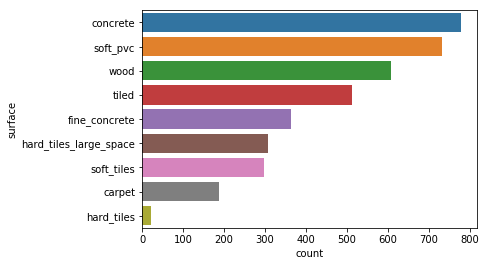

In [10]:
Y_train.head()
# Y_train['surface'].value_counts()
sns.countplot(y='surface',data=Y_train,order = Y_train['surface'].value_counts().index)

In [11]:
print(Y_train.dtypes)
Y_train.head()

series_id     int64
group_id      int64
surface      object
dtype: object


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


# Model

In [12]:
def quaternion_to_euler(df):
    import math
    def Cal_t2(df):
        df['t2']=2.0*(df['orientation_W'] * df['orientation_Y'] + df['orientation_Z'] * df['orientation_X'])
        df['t2']=df['t2'].transform(lambda x:  1.0 if x> +1.0 else x)
        df['t2']=df['t2'].transform(lambda x: -1.0 if x< -1.0 else x)
        return df
        
#     t0 = +2.0 * (w * x + y * z)
#     t1 = +1.0 - 2.0 * (x * x + y * y)
#     Euler_X = math.atan2(t0, t1)

#     t2 = +2.0 * (w * y - z * x)
#     t2 = +1.0 if t2 > +1.0 else t2
#     t2 = -1.0 if t2 < -1.0 else t2
#     Euler_Y = math.asin(t2)

#     t3 = +2.0 * (w * z + x * y)
#     t4 = 
#     Euler_Z = math.atan2(t3, t4)

    df['t0']=2.0 * (df['orientation_W'] * df['orientation_X'] + df['orientation_Y'] * df['orientation_Z'])
    df['t1']=2.0 * (df['orientation_W'] * df['orientation_X'] + df['orientation_Y'] * df['orientation_Z'])
#     df['t2']=df.transform(Cal_t2)
    df['t3']=2.0 * (df['orientation_W'] * df['orientation_Z'] + df['orientation_X'] * df['orientation_Y'])
    df['t4']=1.0 - 2.0 * (df['orientation_Y']**2 + df['orientation_Z']**2)
    df=Cal_t2(df)
    
    df['Euler_X']=np.arctan2(df['t0'], df['t1'])
    df['Euler_Y']=np.arcsin(df['t2'])
    df['Euler_Z']=np.arctan2(df['t3'], df['t4'])
    del df['t0']
    del df['t1']
    del df['t2']
    del df['t3']
    del df['t4']
    return df

def fe(data):
    
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5   
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    data=quaternion_to_euler(data)
    data['Total_Euler']=(data['Euler_X']**2+data['Euler_Y']**2+data['Euler_Z']**2)**0.5
    data['Norm_x']=data['orientation_X']/data['totl_xyz']**2
    data['Norm_y']=data['orientation_Y']/data['totl_xyz']**2
    data['Norm_z']=data['orientation_Z']/data['totl_xyz']**2
#     print(data.columns)

    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))    
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number','Euler_X']:#
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
        df[col + '_mean_change_of_abs_change'] = data.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + 'RMS']=data.groupby('series_id')[col].apply(np.sum(lambda x: x**2))
#         del df[col + '_abs_min']
    return df

In [13]:
%%time
train = fe(X_train)
test = fe(X_test)

Wall time: 1min 52s


In [14]:
print(train.shape)
print(test.shape)
# train

(3810, 260)
(3816, 260)


In [15]:
# Y_train
le = LabelEncoder()
Y_train['surface'] = le.fit_transform(Y_train['surface'])
print(Y_train.dtypes,Y_train.shape)
# Y_train.head()

series_id    int64
group_id     int64
surface      int32
dtype: object (3810, 3)


In [16]:
# #Fill missing NO.
# X_train.fillna(0, inplace = True)
# X_test.fillna(0, inplace = True)
# X_train.replace(-np.inf, 0, inplace = True)
# X_train.replace(np.inf, 0, inplace = True)
# X_test.replace(-np.inf, 0, inplace = True)
# X_test.replace(np.inf, 0, inplace = True)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
sub_preds_rf = np.zeros((test.shape[0], 9))
# print(sub_preds_rf.shape,sub_preds_rf)
oof_preds_rf = np.zeros((train.shape[0]))
score = 0
for i, (train_index, test_index) in enumerate(folds.split(train, Y_train['surface'])):
    print('-'*20, i, '-'*20)
    
    clf =  RandomForestClassifier(n_estimators = 50, n_jobs = -1)
    clf.fit(train.iloc[train_index], Y_train['surface'][train_index])
    oof_preds_rf[test_index] = clf.predict(train.iloc[test_index])
    sub_preds_rf += clf.predict_proba(test) / folds.n_splits
    score += clf.score(train.iloc[test_index], Y_train['surface'][test_index])
    print('train data score: ', clf.score(train.iloc[test_index], Y_train['surface'][test_index]))
    importances = clf.feature_importances_
#     print('importances:',importances)
    indices = np.argsort(importances)[::-1]
    print('indices length:',len(indices))
#     print('indices：',indices)
    features = train.columns
#     print('features',features)
#     print('importances after argsort',importances[indices])
    
   

#     hm = 240
#     plt.figure(figsize=(7, 40))
#     plt.title('Feature Importances')
#     plt.barh(range(len(indices[:hm])), importances[indices][:hm][::-1], color='b', align='center')
#     plt.yticks(range(len(indices[:hm])), [features[i] for i in indices][::-1])
#     plt.xlabel('Relative Importance')
#     plt.show()

print('Avg Accuracy', score / folds.n_splits)
# sub_preds_rf

-------------------- 0 --------------------
train data score:  0.8720626631853786
indices length: 260
-------------------- 1 --------------------
train data score:  0.8797385620915033
indices length: 260
-------------------- 2 --------------------
train data score:  0.8674540682414699
indices length: 260
-------------------- 3 --------------------
train data score:  0.8842105263157894
indices length: 260
-------------------- 4 --------------------
train data score:  0.8850726552179656
indices length: 260
Avg Accuracy 0.8777076950104213


In [18]:
Y_train['surface']
oof_preds_rf

array([2., 1., 5., ..., 8., 2., 5.])

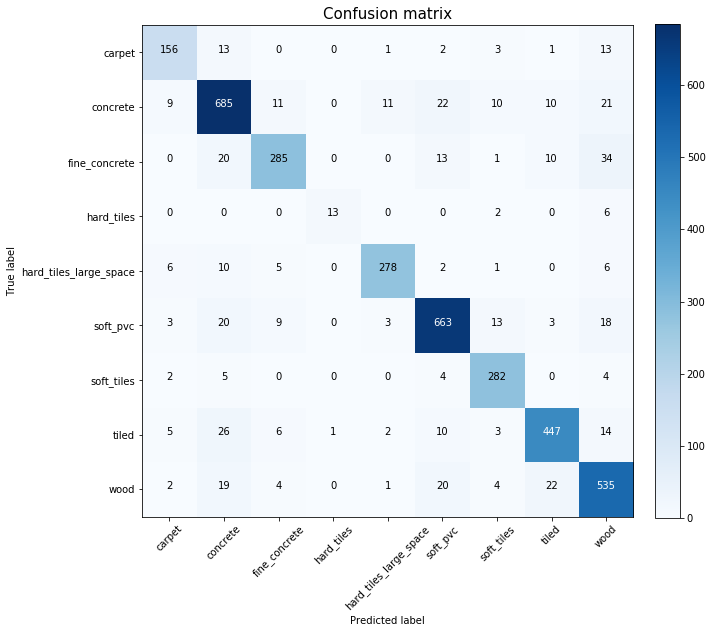

In [19]:
# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     fig, ax = plt.subplots()
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return ax
import itertools
def plot_confusion_matrix(truth, pred, classes, normalize=False, title=''):
    cm = confusion_matrix(truth, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', size=15)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.tight_layout()
from sklearn.metrics import confusion_matrix
# print()
plot_confusion_matrix(Y_train['surface'],oof_preds_rf,le.classes_)

In [20]:
Submission['surface'] = le.inverse_transform(sub_preds_rf.argmax(axis=1))
Submission.to_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\Submission.csv', index=False)
Submission.head(10)

,series_id,surface
0,0,hard_tiles_large_space
1,1,concrete
2,2,tiled
3,3,carpet
4,4,soft_tiles
5,5,concrete
6,6,soft_pvc
7,7,concrete
8,8,wood
9,9,wood


In [21]:
#xgboost
from xgboost import XGBClassifier
sub_preds_xgboost = np.zeros((test.shape[0], 9))
oof_preds_xgboost = np.zeros((train.shape[0]))
score = 0
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, Y_train['surface'])):
    xgb_clf =  XGBClassifier(n_jobs = -1)
    xgb_clf.fit(train.iloc[trn_idx], Y_train['surface'][trn_idx])
    oof_preds_xgboost[val_idx] = xgb_clf.predict(train.iloc[val_idx])
    sub_preds_xgboost += xgb_clf.predict_proba(test) / folds.n_splits
    score += xgb_clf.score(train.iloc[val_idx], Y_train['surface'][val_idx])
    print('Fold: {} score: {}'.format(fold_,xgb_clf.score(train.iloc[val_idx], Y_train['surface'][val_idx])))
print('Avg Accuracy', score / folds.n_splits)
y_test_pred_final = np.array(sub_preds_rf.argmax(axis=1)*0.5+sub_preds_xgboost.argmax(axis=1)*0.5)
y_test_pred_final = np.array([int(val) for val in y_test_pred_final])


Fold: 0 score: 0.835509138381201
Fold: 1 score: 0.85359477124183
Fold: 2 score: 0.8556430446194225
Fold: 3 score: 0.8526315789473684
Fold: 4 score: 0.845442536327609
Avg Accuracy 0.8485642139034862


In [22]:
y_test=Submission.copy()
y_test['surface'] = le.inverse_transform(y_test_pred_final)
y_test.to_csv('.\\Kaggle\\CareerCon 2019 - Help Navigate Robots\\data\\submission_xgboost.csv', index=False)